# Heart disease analysis and prediction system

#### Importing Data form heart.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
df=pd.read_csv('C:/Users/Dell/Desktop/HeartHealthPrediction-master/heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


# Data Cleansing 

#### Listing Null Values form data

In [2]:
print(df.isnull().sum())

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         2
Target       0
dtype: int64


##### Droping Null values because Null values are very less as compared to data size

In [3]:
df=df.dropna()

##### Give the info of Data Type

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        301 non-null    int64  
 1   Sex        301 non-null    int64  
 2   ChestPain  301 non-null    object 
 3   RestBP     301 non-null    int64  
 4   Chol       301 non-null    int64  
 5   Fbs        301 non-null    int64  
 6   RestECG    301 non-null    int64  
 7   MaxHR      301 non-null    int64  
 8   ExAng      301 non-null    int64  
 9   Oldpeak    301 non-null    float64
 10  Slope      301 non-null    int64  
 11  Ca         301 non-null    int64  
 12  Thal       301 non-null    object 
 13  Target     301 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 35.3+ KB


##### Describing the wohle Data

In [5]:
df.describe()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.00000,301.000000
mean,54.451827,0.681063,131.714286,246.936877,0.146179,0.990033,149.700997,0.325581,1.043189,1.601329,0.69103,0.458472
std,9.067258,0.466841,17.655729,51.859869,0.353874,0.994937,22.860817,0.469372,1.163384,0.616872,0.94915,0.499102
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,0.000000
25%,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.00000,0.000000
50%,56.000000,1.000000,130.000000,242.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.00000,0.000000
75%,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.00000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,1.000000


##### Pandas Profiling Provide the Report of data set including Corelation

#### Target Stats

In [6]:
d=df['Target'].value_counts()
print(d)
No_Disease = len(df[df['Target'] ==0])
Diseased = len(df[df['Target'] ==1])

print('Percentage of No_Disease: {:.2f} %' .format(No_Disease/len(df['Target'])*100))
print('Percentage of Diseased: {:.2f} %' .format(Diseased/len(df['Target'])*100))

0    163
1    138
Name: Target, dtype: int64
Percentage of No_Disease: 54.15 %
Percentage of Diseased: 45.85 %


#### Age Stats

In [7]:
min_age = df['Age'].min()
max_age = df['Age'].max()
mean_age = round(df['Age'].mean(),1)

print('Min age: %s' %min_age)
print('Max age: %s' %max_age)
print('Mean age: %s' %mean_age)

Min age: 29
Max age: 77
Mean age: 54.5


#### Sex Stats

In [8]:
female = len(df[df['Sex'] ==0])
male = len(df[df['Sex'] ==1])

print('Percentage of female: {:.2f} %' .format(female/len(df['Sex'])*100))
print('Percentage of male: {:.2f} %' .format(male/len(df['Sex'])*100))

Percentage of female: 31.89 %
Percentage of male: 68.11 %


# Data Visualization 

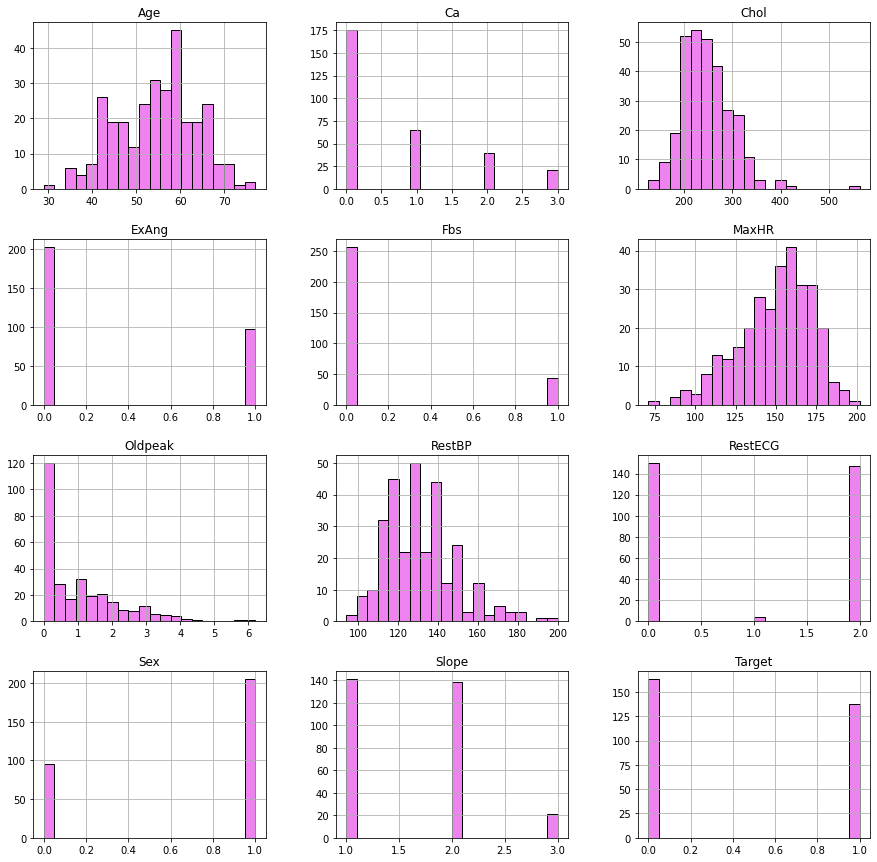

In [9]:
df.hist(bins=20,figsize=(15,15),grid=True,ec='black',color='violet')
plt.show()

<Figure size 1080x864 with 0 Axes>

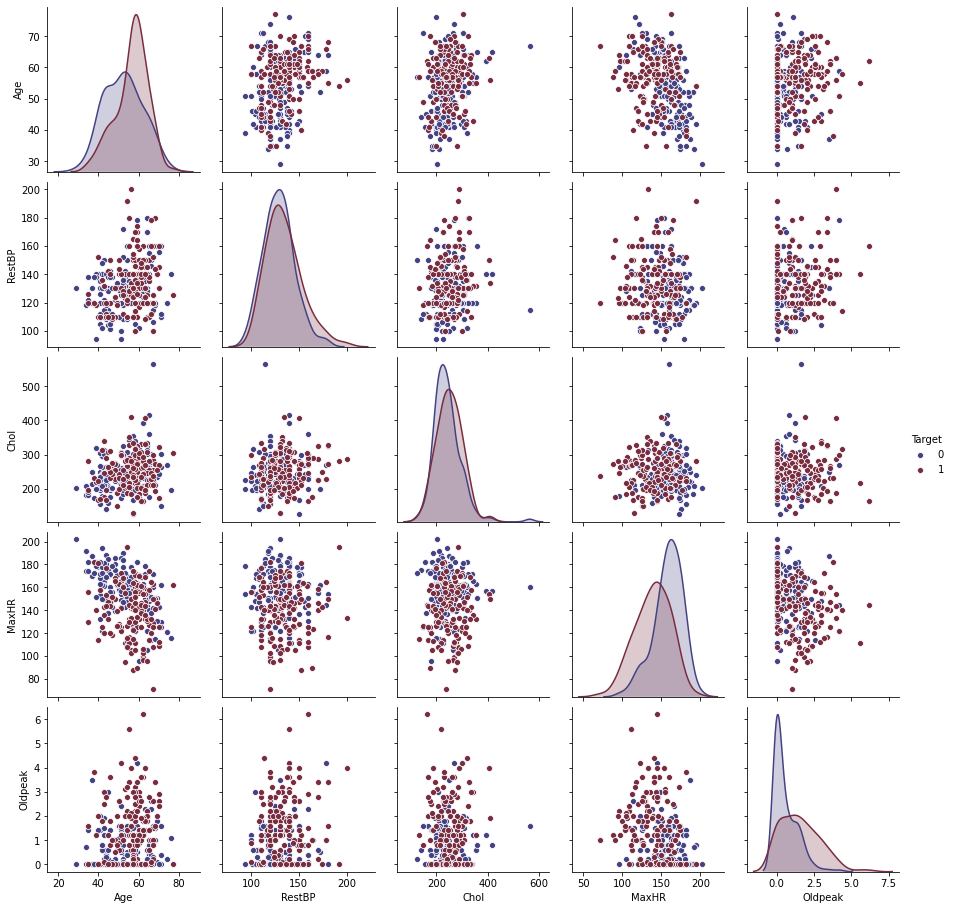

In [10]:
plt.figure(figsize = (15,12))
sns.pairplot(df[['Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak','Target']],hue='Target',palette='icefire')
plt.show()

##### Heart Diseases Ratio in Dataset
###### Blue Graph indicate no heart desease and Orange Graph show Heart desease

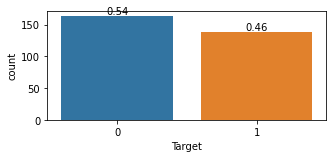

In [11]:
def plotTarget():
    sns.countplot(x='Target', data=df, ax=ax)
    for i, p in enumerate(ax.patches):
        count=df['Target'].value_counts().values[i]
        x=p.get_x()+ p.get_width() /2.
        y=p.get_height() + 3
        label='{:1.2f}'.format(count / float(df.shape[0]))
        ax.text(x, y,label, ha='center')
        
fig_target,ax=plt.subplots(nrows=1, ncols=1, figsize=(5, 2))
plotTarget()

In [12]:
df.corr()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Target
Age,1.000000,-0.098138,0.284734,0.208287,0.121670,0.149037,-0.395982,0.092985,0.203604,0.162228,0.331939,0.224394
Sex,-0.098138,1.000000,-0.065284,-0.202126,0.041025,0.029016,-0.057065,0.140802,0.098482,0.031571,0.100345,0.272006
RestBP,0.284734,-0.065284,1.000000,0.129371,0.178498,0.147089,-0.046402,0.065564,0.188801,0.117437,0.100535,0.151471
Chol,0.208287,-0.202126,0.129371,1.000000,0.015762,0.171185,-0.005690,0.064250,0.044836,-0.004228,0.106125,0.086762
Fbs,0.121670,0.041025,0.178498,0.015762,1.000000,0.079892,-0.012297,0.013534,0.004855,0.054079,0.164689,0.015613
RestECG,0.149037,0.029016,0.147089,0.171185,0.079892,1.000000,-0.077950,0.092626,0.117580,0.140144,0.127330,0.177049
MaxHR,-0.395982,-0.057065,-0.046402,-0.005690,-0.012297,-0.077950,1.000000,-0.386043,-0.349391,-0.393527,-0.256365,-0.425870
ExAng,0.092985,0.140802,0.065564,0.064250,0.013534,0.092626,-0.386043,1.000000,0.287926,0.254076,0.151731,0.427860
Oldpeak,0.203604,0.098482,0.188801,0.044836,0.004855,0.117580,-0.349391,0.287926,1.000000,0.576795,0.274451,0.423894
Slope,0.162228,0.031571,0.117437,-0.004228,0.054079,0.140144,-0.393527,0.254076,0.576795,1.000000,0.102041,0.335806


##### Select Age as most dependent data on label 
###### Disease Probability Bar Plot

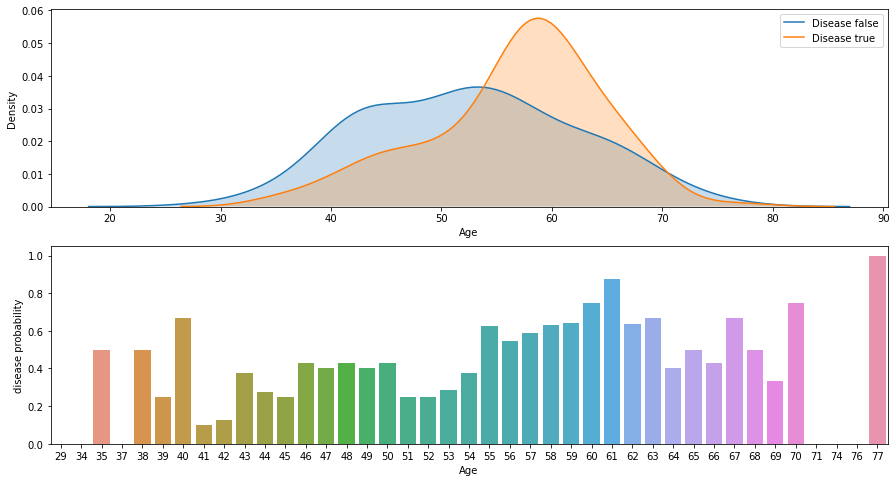

<Figure size 216x216 with 0 Axes>

In [13]:
def plotAge():
    facet_grid = sns.FacetGrid(df, hue='Target')
    facet_grid.map(sns.kdeplot, "Age", shade=True, ax=axes[0])
    legend_labels = ['Disease false', 'Disease true']
    for t, l in zip(axes[0].get_legend().texts, legend_labels):
        t.set_text(l)
        axes[0].set(xlabel='Age', ylabel='Density')

    avg = df[["Age", "Target"]].groupby(['Age'], as_index=False).mean()
    sns.barplot(x='Age', y='Target', data=avg, ax=axes[1])
    axes[1].set(xlabel='Age', ylabel='disease probability')

    plt.clf()

fig_age, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))
plotAge()

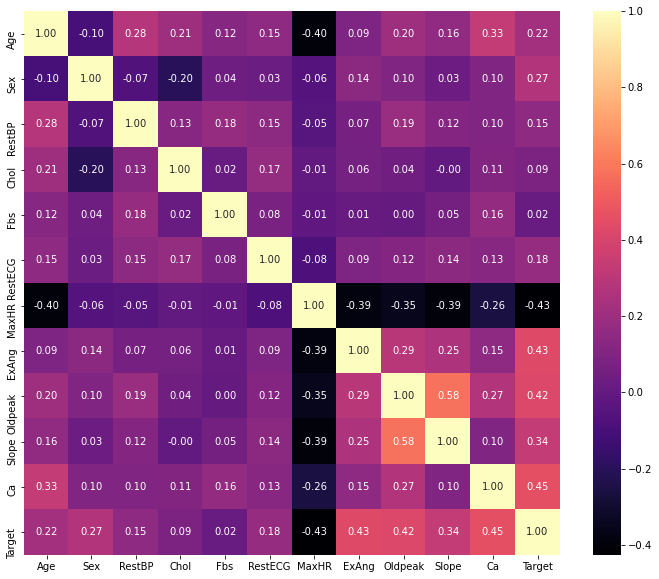

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

##### Checking For Categorical Data

In [15]:
x=df['ChestPain']
x.value_counts()

asymptomatic    143
nonanginal       85
nontypical       50
typical          23
Name: ChestPain, dtype: int64

In [16]:
x=df['Thal']
x.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

##### Ploting Function For Categorical Data " Chest Pain" && "Thalassemia"
##### Ploting Function For Continoius Data

In [17]:
category=[('ChestPain', ['typical','nontypical','nonanginal','asymptomatic']),('Thal',['fixed','normal','reversable',])]
continuous = [('Age', 'Age in year'),
              ('Sex','1 for Male 0 for Female'),
              ('RestBP','BP in Rest State'),
              ('Fbs','Fasting blood glucose'),
              ('RestECG','ECG at rest'),
              ('Chol', 'serum cholestoral in mg/d'),
              ('MaxHR','Max Heart Rate'),
              ('ExAng','Exchange Rate'),
              ('Slope','Slope of Curve'),
              ('Oldpeak', 'ST depression by exercise relative to rest'), 
              ('Ca', '# major vessels: (0-3) colored by flourosopy')]

        
def plotCategorial(attribute, labels, ax_index):
    sns.countplot(x=attribute, data=df, ax=axes[ax_index][0])
    sns.countplot(x='Target', hue=attribute, data=df, ax=axes[ax_index][1])
    avg = df[[attribute, 'Target']].groupby([attribute], as_index=False).mean()
    sns.barplot(x=attribute, y='Target', hue=attribute, data=avg, ax=axes[ax_index][2])
    
    for t, l in zip(axes[ax_index][1].get_legend().texts, labels):
        t.set_text(l)
    for t, l in zip(axes[ax_index][2].get_legend().texts, labels):
        t.set_text(l)


def plotContinuous(attribute, xlabel, ax_index):
    sns.distplot(df[[attribute]], ax=axes[ax_index][0])
    axes[ax_index][0].set(xlabel=xlabel, ylabel='density')
    sns.violinplot(x='Target', y=attribute, data=df, ax=axes[ax_index][1])
    
    
def plotGrid(isCategorial):
    if isCategorial:
        [plotCategorial(x[0], x[1], i) for i, x in enumerate(category)] 
    else:
        [plotContinuous(x[0], x[1], i) for i, x in enumerate(continuous)]

##### Categorical Plot

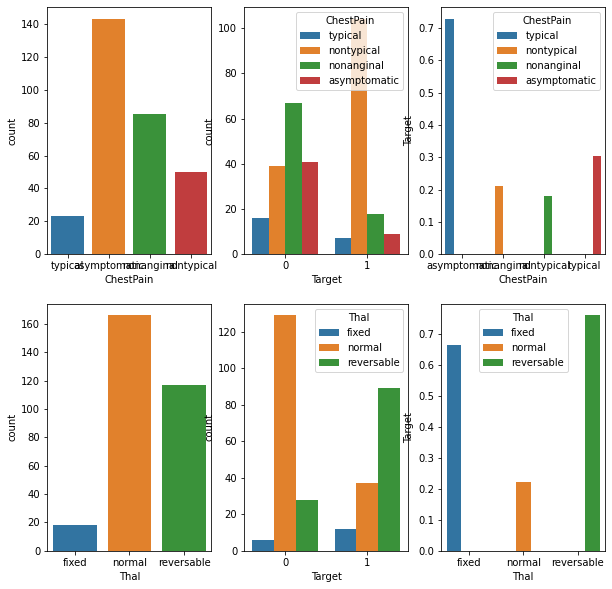

In [18]:
fig_categorial,axes=plt.subplots(nrows=len(category), ncols=3, figsize=(10, 10))
plotGrid(isCategorial=True)

##### Continuous Plot

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


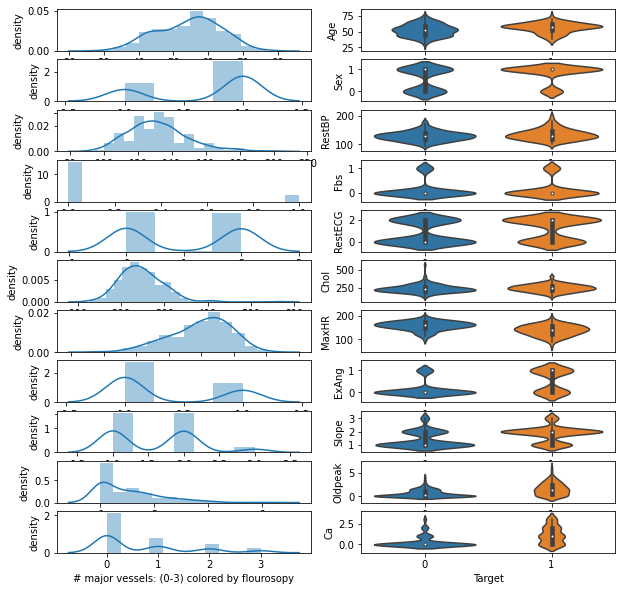

In [19]:
fig_continuous, axes = plt.subplots(nrows=len(continuous), ncols=2, figsize=(10,10))
plotGrid(isCategorial=False)

##### Creating Dummy

In [20]:
#dummy for chest Pain
chestpain_dummy = pd.get_dummies(df.loc[:,'ChestPain'])
chestpain_dummy.rename(columns={1: 'Typical', 2: 'Asymptomatic',3: 'Nonanginal', 4: 'Nontypical'}, inplace=True)
#dummy for RestECG
restecg_dummy = pd.get_dummies(df.loc[:,'RestECG'])
restecg_dummy.rename(columns={0: 'Normal_restECG', 1: 'Wave_abnormal_restECG',2:'Ventricular_ht_restECG'},inplace=True)
#dummy for Slope
slope_dummy = pd.get_dummies(df['Slope'])
slope_dummy.rename(columns={1: 'Slope_upsloping', 2:'Slope_flat',3: 'Slope_downsloping'},inplace=True)
#dummy for Thal
thal_dummy = pd.get_dummies(df['Thal'])
thal_dummy.rename(columns={3: 'Thal_Normal', 6: 'Thal_fixed',7: 'Thal_reversible'}, inplace=True)
#concatination in data frame
df = pd.concat([df,chestpain_dummy, restecg_dummy, slope_dummy, thal_dummy], axis=1)
#droping Column because their dummies are created
df.drop(['ChestPain','RestECG', 'Slope', 'Thal'], axis=1, inplace=True)

##### Checking the No object will left

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301 entries, 0 to 302
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     301 non-null    int64  
 1   Sex                     301 non-null    int64  
 2   RestBP                  301 non-null    int64  
 3   Chol                    301 non-null    int64  
 4   Fbs                     301 non-null    int64  
 5   MaxHR                   301 non-null    int64  
 6   ExAng                   301 non-null    int64  
 7   Oldpeak                 301 non-null    float64
 8   Ca                      301 non-null    int64  
 9   Target                  301 non-null    int64  
 10  asymptomatic            301 non-null    uint8  
 11  nonanginal              301 non-null    uint8  
 12  nontypical              301 non-null    uint8  
 13  typical                 301 non-null    uint8  
 14  Normal_restECG          301 non-null    ui

##### Checking dataset

In [22]:
df.head()

,Age,Sex,RestBP,Chol,Fbs,MaxHR,ExAng,Oldpeak,Ca,Target,...,typical,Normal_restECG,Wave_abnormal_restECG,Ventricular_ht_restECG,Slope_upsloping,Slope_flat,Slope_downsloping,fixed,normal,reversable
0,63,1,145,233,1,150,0,2.3,0,0,...,1,0,0,1,0,0,1,1,0,0
1,67,1,160,286,0,108,1,1.5,3,1,...,0,0,0,1,0,1,0,0,1,0
2,67,1,120,229,0,129,1,2.6,2,1,...,0,0,0,1,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0,0,...,0,1,0,0,0,0,1,0,1,0
4,41,0,130,204,0,172,0,1.4,0,0,...,0,0,0,1,1,0,0,0,1,0


##### Selecting label means selected Column to predict in df_X and input column in df_y

In [23]:
df_X= df.loc[:, df.columns != 'Target']
df_y= df.loc[:, df.columns == 'Target']

# Model Training 

In [24]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
selected_features=[]
lr=LogisticRegression()
rfe=RFE(lr,20)

warnings.simplefilter('ignore')
rfe.fit(df_X.values,df_y.values)
print(rfe.support_)
print(rfe.ranking_)

for i, feature in enumerate(df_X.columns.values):
    if rfe.support_[i]:
        selected_features.append(feature)

df_selected_X = df_X[selected_features]
df_selected_y=df_y

lm=sm.Logit(df_selected_y,df_selected_X)
result = lm.fit()

print(result.summary2())
warnings.simplefilter('ignore')

[ True  True False False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]
[1 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Optimization terminated successfully.
         Current function value: 0.332484
         Iterations 7
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.518     
Dependent Variable:          Target                  AIC:                     234.1552  
Date:                        2023-07-12 14:58        BIC:                     297.1760  
No. Observations:            301                     Log-Likelihood:          -100.08   
Df Model:                    16                      LL-Null:                 -207.60   
Df Residuals:                284                     LLR p-value:             7.1034e-37
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              7.0000       

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


##### Spliting Values into test and traning Dataset in the ratio 0.75:0.25

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(df_selected_X,df_selected_y, test_size = 0.25, random_state =0)
columns = X_train.columns

##### Calculating Accuracy Function and confusion Matrix of the Models

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def cal_accuracy(y_test, y_predict): 
    
    print("\nConfusion Matrix: \n", 
    confusion_matrix(y_test, y_predict)) 
      
    print (f"\nAccuracy : {accuracy_score(y_test,y_predict)*100:0.3f}")

# Logistic Regression

In [27]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
print(f"Accuracy of Test Dataset: {lr.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {lr.score(X_train,y_train):0.3f}")
warnings.simplefilter('ignore')

Accuracy of Test Dataset: 0.842
Accuracy of Train Dataset: 0.849


##### Vale Prediction for Test dataset for Logistic Regression

Predicted values:
[1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 0]

Confusion Matrix: 
 [[34  6]
 [ 6 30]]

Accuracy : 84.211
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        40
           1       0.83      0.83      0.83        36

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



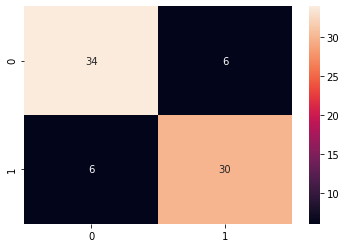

In [28]:
y_predict=lr.predict(X_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Support Vector Machine

In [29]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {svm_linear.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {svm_linear.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.855
Accuracy of Train Dataset: 0.858


##### Vale Prediction for Test dataset for SVM

Predicted values:
[1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0]

Confusion Matrix: 
 [[35  5]
 [ 6 30]]

Accuracy : 85.526
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        40
           1       0.86      0.83      0.85        36

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76



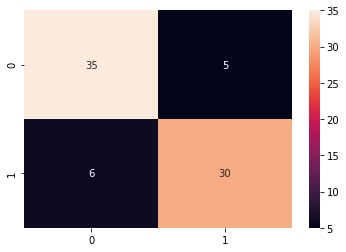

In [30]:
y_predict=svm_linear.predict(X_test)
print("Predicted values:") 
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
gini = DecisionTreeClassifier(criterion = "gini", random_state =100,max_depth=3, min_samples_leaf=5)
gini.fit(X_train, y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {gini.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {gini.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.697
Accuracy of Train Dataset: 0.831


##### Vale Prediction for Test dataset for Decision Tree

Predicted values:

[1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0
 0 1]

Confusion Matrix: 
 [[28 12]
 [11 25]]

Accuracy : 69.737
              precision    recall  f1-score   support

           0       0.72      0.70      0.71        40
           1       0.68      0.69      0.68        36

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.70      0.70      0.70        76



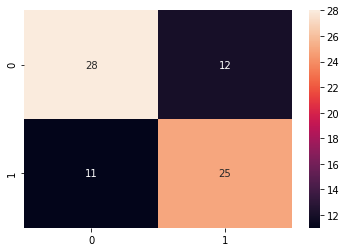

In [32]:
y_predict=gini.predict(X_test) 
print("Predicted values:\n")
print(y_predict) 
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Desicion Tree Diagram

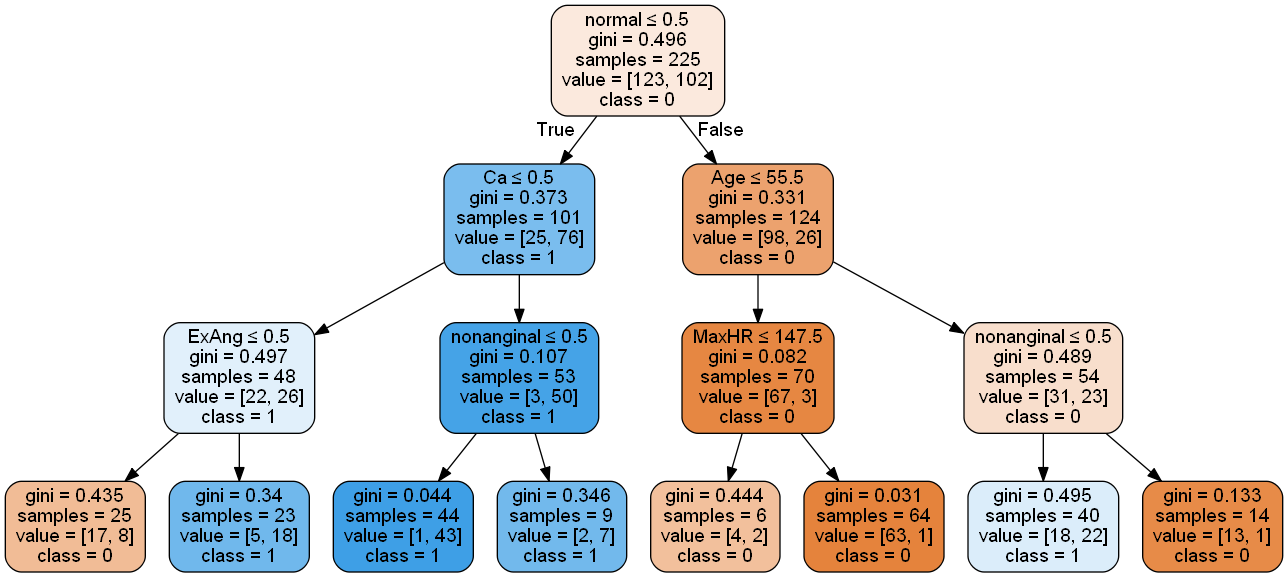

In [33]:
from io import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(decision_tree=gini, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X_test.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart-disease-analysis-prediction.png')
Image(graph.create_png())

# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_estimators=100)
forest.fit(X_train,y_train)

warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {forest.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {forest.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.842
Accuracy of Train Dataset: 1.000


##### Over Fitting Issue
##### Vale Prediction for Test dataset for Rondom Forest

Predicted values:

[1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1
 1 0]

Confusion Matrix: 
 [[33  7]
 [ 5 31]]

Accuracy : 84.211
              precision    recall  f1-score   support

           0       0.87      0.82      0.85        40
           1       0.82      0.86      0.84        36

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



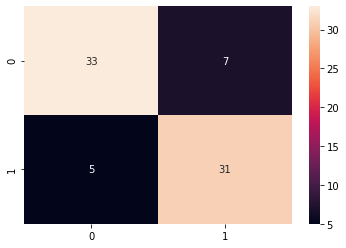

In [35]:
y_predict=forest.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Naive Bayes

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {nb.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {nb.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.803
Accuracy of Train Dataset: 0.809


##### Vale Prediction for Test dataset for Naive Bayes

Predicted values:

[1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1
 0 1]

Confusion Matrix: 
 [[31  9]
 [ 6 30]]

Accuracy : 80.263
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        40
           1       0.77      0.83      0.80        36

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.81      0.80      0.80        76



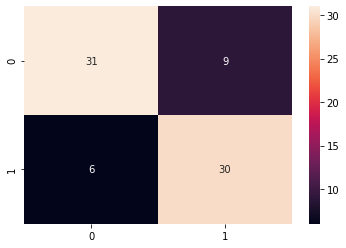

In [37]:
y_predict = nb.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# K Nearest Neighbor(KNN)

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
warnings.simplefilter('ignore')

In [39]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

Predicted values:

[1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 0 0 1
 1 1]

Confusion Matrix: 
 [[33  7]
 [ 6 30]]

Accuracy : 82.895
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        40
           1       0.81      0.83      0.82        36

    accuracy                           0.83        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.83      0.83      0.83        76



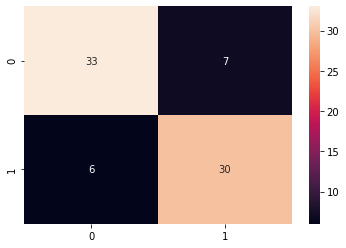

In [40]:
y_predict = classifier.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# XGBoost 

In [41]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {XGB.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {XGB.score(X_train,y_train):0.3f}")

[15:19:29] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Test Dataset: 0.816
Accuracy of Train Dataset: 1.000


Predicted values:

[1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0
 1 1]

Confusion Matrix: 
 [[32  8]
 [ 6 30]]

Accuracy : 81.579
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        40
           1       0.79      0.83      0.81        36

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



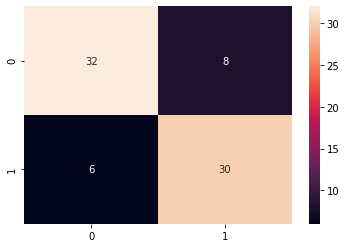

In [42]:
y_predict=XGB.predict(X_test)
print('Predicted values:\n')
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ABC=AdaBoostClassifier()
ABC.fit(X_train,y_train)
warnings.simplefilter('ignore')
print(f"Accuracy of Test Dataset: {ABC.score(X_test,y_test):0.3f}")
print(f"Accuracy of Train Dataset: {ABC.score(X_train,y_train):0.3f}")

Accuracy of Test Dataset: 0.789
Accuracy of Train Dataset: 0.902


Predicted values:

[1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0
 1 0]

Confusion Matrix: 
 [[31  7]
 [ 9 29]]

Accuracy : 78.947
              precision    recall  f1-score   support

           0       0.82      0.78      0.79        40
           1       0.76      0.81      0.78        36

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



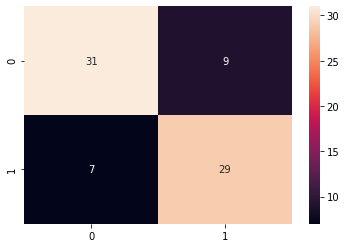

In [44]:
y_predict=ABC.predict(X_test)
print('Predicted values:\n')
print(y_predict)
cal_accuracy(y_predict,y_test)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Artificial Neural Network (ANN)

In [45]:
from keras.models import Sequential
from keras.layers import Dense

In [46]:
ANN = Sequential(name='DCNN')
ANN.add(Dense(11,activation='relu',input_dim=20))
ANN.add(Dense(1,activation='sigmoid'))

ANN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
ANN.fit(X_train,y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 12s 1ms/step - loss: 0.8185 - accuracy: 0.4771
Epoch 2/300
8/8 [==============================] - 0s 997us/step - loss: 0.7383 - accuracy: 0.5075
Epoch 3/300
8/8 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.5535
Epoch 4/300
8/8 [==============================] - 0s 1ms/step - loss: 0.6333 - accuracy: 0.6356
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6254 - accuracy: 0.6139
Epoch 6/300
8/8 [==============================] - 0s 1ms/step - loss: 0.5996 - accuracy: 0.6905
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 0.5787 - accuracy: 0.7148
Epoch 8/300
8/8 [==============================] - 0s 1ms/step - loss: 0.5812 - accuracy: 0.7296
Epoch 9/300
8/8 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7597
Epoch 10/300
8/8 [==============================] - 0s 1ms/step - loss: 0.5330 - accuracy: 0.7945
Epoch 11/300
8/8 [========

Predicted values:

[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0]

Confusion Matrix: 
 [[32  4]
 [ 8 32]]

Accuracy : 84.211
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        40
           1       0.80      0.89      0.84        36

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.85      0.84      0.84        76



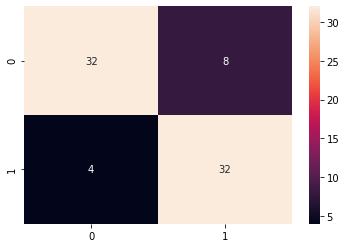

In [48]:
y_predict=ANN.predict(X_test)
print('Predicted values:\n')
rounded = [round(x[0]) for x in y_predict]
y_predict=rounded
print(y_predict)
cal_accuracy(y_predict,y_test)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

# Cross Validation For Models

In [49]:
from sklearn import model_selection
kfold=model_selection.KFold(n_splits=10, random_state=7)
models=[('Logistic Regression', lr), ('Support Vector Machine', svm_linear), ('Decision Tree', gini),
        ('Random Forest', forest), ('K Nearest Neighbor', classifier),('XGBoost',XGB),('AdaBoostClassifier', ABC)]
warnings.simplefilter('ignore')

for model in models:
    results=model_selection.cross_val_score(model[1],X_train,y_train,cv=kfold,scoring='accuracy')
    print(f"Cross validated Accuracy of  {model[0]}: {results.mean():.3f}")

Cross validated Accuracy of  Logistic Regression: 0.795
Cross validated Accuracy of  Support Vector Machine: 0.800
Cross validated Accuracy of  Decision Tree: 0.799
Cross validated Accuracy of  Random Forest: 0.808
Cross validated Accuracy of  K Nearest Neighbor: 0.791
[15:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:19:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

In [50]:
models=pd.DataFrame({'Model':['Logistics Regression','Support Vector Machine','Decision Tree','Random Forest','Naive Bayes','K Nearest Neighbor','eXtreme Gradient Boosting','AdaBoost'],
                     'Traning Accuracy':[(lr.score(X_train,y_train)),svm_linear.score(X_train,y_train),gini.score(X_train,y_train),forest.score(X_train,y_train),nb.score(X_train,y_train),classifier.score(X_train,y_train),XGB.score(X_train,y_train),ABC.score(X_train,y_train)],
                     'Test Accuracy':[(lr.score(X_test,y_test)),svm_linear.score(X_test,y_test),gini.score(X_test,y_test),forest.score(X_test,y_test),nb.score(X_test,y_test),classifier.score(X_test,y_test),XGB.score(X_test,y_test),ABC.score(X_test,y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

,Model,Traning Accuracy,Test Accuracy
4,Naive Bayes,0.840000,0.855263
5,K Nearest Neighbor,0.835556,0.828947
0,Logistics Regression,0.840000,0.815789
3,Random Forest,0.853333,0.815789
6,eXtreme Gradient Boosting,1.000000,0.815789
7,AdaBoost,0.902222,0.789474
1,Support Vector Machine,0.702222,0.697368
2,Decision Tree,0.791111,0.697368


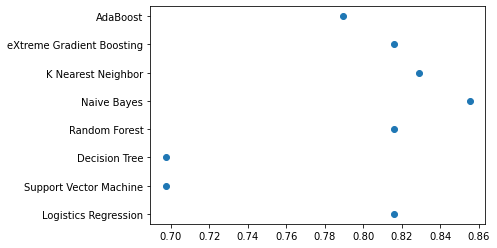

In [51]:
x=[lr.score(X_test,y_test),svm_linear.score(X_test,y_test),gini.score(X_test,y_test),forest.score(X_test,y_test),nb.score(X_test,y_test),classifier.score(X_test,y_test),XGB.score(X_test,y_test),ABC.score(X_test,y_test)]
y=['Logistics Regression','Support Vector Machine','Decision Tree','Random Forest','Naive Bayes','K Nearest Neighbor','eXtreme Gradient Boosting','AdaBoost']
plt.scatter(x,y)

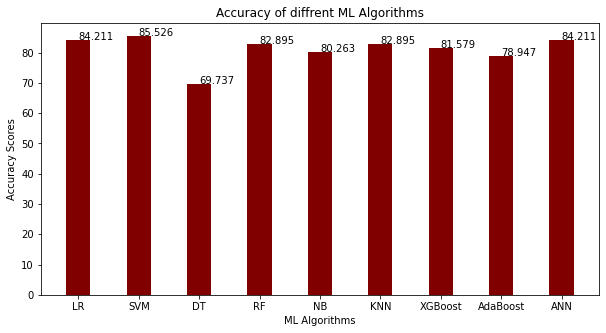

In [52]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'LR':84.211,'SVM':85.526,'DT':69.737, 'RF':82.895,'NB':80.263, 'KNN':82.895,'XGBoost':81.579,'AdaBoost':78.947,'ANN':84.211}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10,5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)
for i in range(len(courses)):
    plt.text(i,values[i],values[i])

plt.xlabel("ML Algorithms")
plt.ylabel("Accuracy Scores")
plt.title("Accuracy of diffrent ML Algorithms")
plt.show()


### Best Model for Dataset is Logistic Regression

## Gridsearch on Random Forest to increase the accuracy 

In [53]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
             }

In [54]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [55]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 3, verbose=2)

In [56]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 160 candidates, totalling 480 fits
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17 
[CV]  max_depth=2, max

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.1s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=25, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33 
[CV]  max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=33, total=   0.0s
[CV] max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_s

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:   29.2s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [57]:
grid.best_params_

{'max_depth': 2,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 48}

In [58]:
model = RandomForestClassifier(max_depth=4,max_features='auto',min_samples_leaf=2,min_samples_split=2,n_estimators=25)

In [59]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, min_samples_leaf=2, n_estimators=25)

[1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 0]
[[34  6]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.84      0.86      0.85        36

    accuracy                           0.86        76
   macro avg       0.85      0.86      0.86        76
weighted avg       0.86      0.86      0.86        76



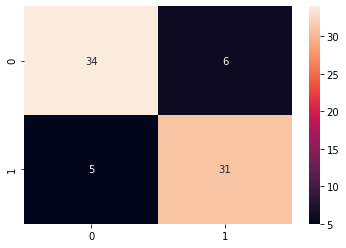

In [60]:
y_predict = model.predict(X_test)
print(y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for random forest  

In [61]:
model.score(X_test,y_test)

0.8552631578947368

## Gridsearch on Logistic Regression to increase the accuracy 

In [62]:
from sklearn.model_selection import GridSearchCV

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
lr_cv=GridSearchCV(lr,grid,cv=10)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [63]:
lr_cv.best_params_

{'C': 0.01, 'penalty': 'l2'}

[1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 0]
[[36  4]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.89      0.86      0.87        36

    accuracy                           0.88        76
   macro avg       0.88      0.88      0.88        76
weighted avg       0.88      0.88      0.88        76



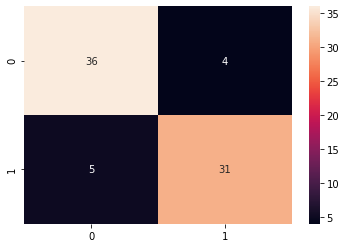

In [64]:
y_predict=lr_cv.predict(X_test)
print(y_predict)
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for Logistic Regression

In [65]:
lr_cv.score(X_test, y_test)

0.881578947368421

## Gridsearch on Support Vector Machine to increase the accuracy

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.533, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.533, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.689, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.533, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf ...................................
[CV] ....... C=1, gamma=0.0001, kernel=rbf, score=0.533, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.622, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.667, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.733, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.556, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.644, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.4s finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [67]:
# print best parameter after tuning
print(grid.best_params_)

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}


In [68]:
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=10, gamma=0.0001)


Predicted values:
[1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1
 1 0]

Confusion Matrix: 
 [[37  3]
 [ 5 31]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.91      0.86      0.89        36

    accuracy                           0.89        76
   macro avg       0.90      0.89      0.89        76
weighted avg       0.90      0.89      0.89        76



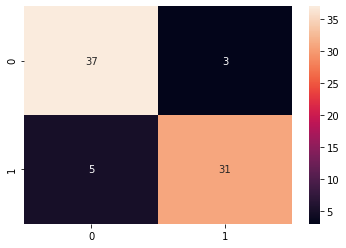

In [69]:
y_predict=grid.predict(X_test)
print("Predicted values:") 
print(y_predict)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_predict))
print("\nClassification Report: \n",classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for Support Vector Machine

In [70]:
grid.score(X_test,y_test)

0.8947368421052632

## Randomized Search on eXtreme Gradient Boosting to increase the accuracy

In [71]:
xgb_classifier = xgb.XGBClassifier()

In [72]:
gbm_param_grid = {
    'n_estimators': range(1,20),
    'max_depth': range(1, 10),
    'learning_rate': [.1,.4, .45, .5, .55, .6],
    'colsample_bytree': [.6, .7, .8, .9, 1],
    'booster':["gbtree"],
     'min_child_weight': [0.001,0.003,0.01],
}

In [73]:
from sklearn.model_selection import RandomizedSearchCV
xgb_random = RandomizedSearchCV(param_distributions=gbm_param_grid, 
                                    estimator = xgb_classifier, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 4)

In [74]:
xgb_random.fit(X_train, y_train)

[15:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:20:30] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [75]:
xgb_bp = xgb_random.best_params_

In [76]:
xgb_model=xgb.XGBClassifier(n_estimators=xgb_bp["n_estimators"],
                            min_child_weight=xgb_bp["min_child_weight"],
                            max_depth=xgb_bp["max_depth"],
                            learning_rate=xgb_bp["learning_rate"],
                            colsample_bytree=xgb_bp["colsample_bytree"],
                            booster=xgb_bp["booster"])

In [77]:
xgb_model.fit(X_train, y_train)

[15:20:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.55, max_delta_step=0, max_depth=5,
              min_child_weight=0.003, missing=nan, monotone_constraints='()',
              n_estimators=6, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Predicted values:
[1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0
 0 0]

Confusion Matrix: 
 [[32  8]
 [ 7 29]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        40
           1       0.78      0.81      0.79        36

    accuracy                           0.80        76
   macro avg       0.80      0.80      0.80        76
weighted avg       0.80      0.80      0.80        76



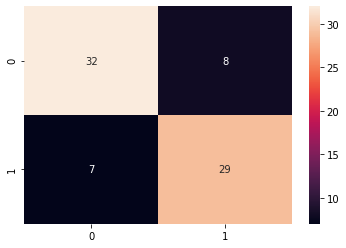

In [78]:
y_predict=xgb_model.predict(X_test)
print("Predicted values:") 
print(y_predict)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_predict))
print("\nClassification Report: \n",classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for  XGBoost (eXtreme Gradient Boosting)

In [79]:
xgb_model.score(X_test, y_test)

0.8026315789473685

## Gridsearch on AdaBoost to increase accuracy

In [80]:
shallow_tree = DecisionTreeClassifier(max_depth=1, random_state = 100)

In [81]:
from sklearn import metrics
estimators = list(range(20,25))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

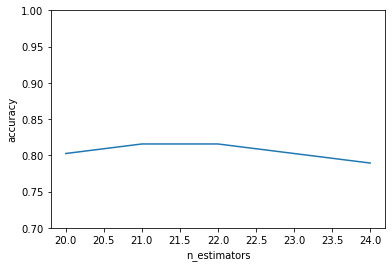

In [82]:
# plot test scores and n_estimators
# plot
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.70, 1])
plt.show()

In [83]:
ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = 21)
    
ABC.fit(X_train, y_train)
y_predict = ABC.predict(X_test)

Predicted values:
[1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0
 1 0]

Confusion Matrix: 
 [[33  7]
 [ 7 29]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        40
           1       0.81      0.81      0.81        36

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76



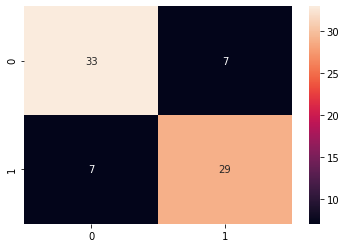

In [84]:
print("Predicted values:") 
print(y_predict)
print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_predict))
print("\nClassification Report: \n",classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

### Accuacy increased for  AdaBoost

In [85]:
print(accuracy_score(y_test,y_predict))

0.8157894736842105


## Gridsearch on Neural Network to increase accuracy

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [87]:
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
def create_binary_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=20, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal',  kernel_regularizer=regularizers.l2(0.001),activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

binary_model = create_binary_model()

print(binary_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 481
Trainable params: 481
Non-trainable params: 0
_________________________________________________________________
None


In [88]:
history=binary_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)

Epoch 1/50
23/23 [==============================] - 1s 12ms/step - loss: 0.6840 - accuracy: 0.6756 - val_loss: 0.6697 - val_accuracy: 0.7895
Epoch 2/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6541 - accuracy: 0.7600 - val_loss: 0.6358 - val_accuracy: 0.8289
Epoch 3/50
23/23 [==============================] - 0s 2ms/step - loss: 0.6200 - accuracy: 0.8000 - val_loss: 0.5964 - val_accuracy: 0.8553
Epoch 4/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.8267 - val_loss: 0.5498 - val_accuracy: 0.8684
Epoch 5/50
23/23 [==============================] - 0s 2ms/step - loss: 0.5284 - accuracy: 0.8222 - val_loss: 0.5065 - val_accuracy: 0.8684
Epoch 6/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4807 - accuracy: 0.8133 - val_loss: 0.4668 - val_accuracy: 0.8684
Epoch 7/50
23/23 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8489 - val_loss: 0.4365 - val_accuracy: 0.8684
Epoch 8/50
23/23 [=

In [ ]:
y_predict=binary_model.predict(X_test)
print('Predicted values:\n')
rounded = [round(x[0]) for x in y_predict]
y_predict = rounded
print(y_predict)
cal_accuracy(y_predict,y_test)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

Predicted values:


### Accuacy increased for Neural Network

In [90]:
print(accuracy_score(y_test,y_predict))

0.8421052631578947


## Gridsearch on k-Nearest Neighbours to increase accuracy

In [91]:
KNN = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
params_KNN = dict(n_neighbors = range(1,10))
grid_search_KNN = GridSearchCV(KNN, param_grid = params_KNN, cv =4, scoring='recall')
grid_search_KNN.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 10)}, scoring='recall')

For a k-Nearest Neighbors model, the optimal value of k is 9


Text(0, 0.5, 'Mean recall over 4 cross-validation sets')

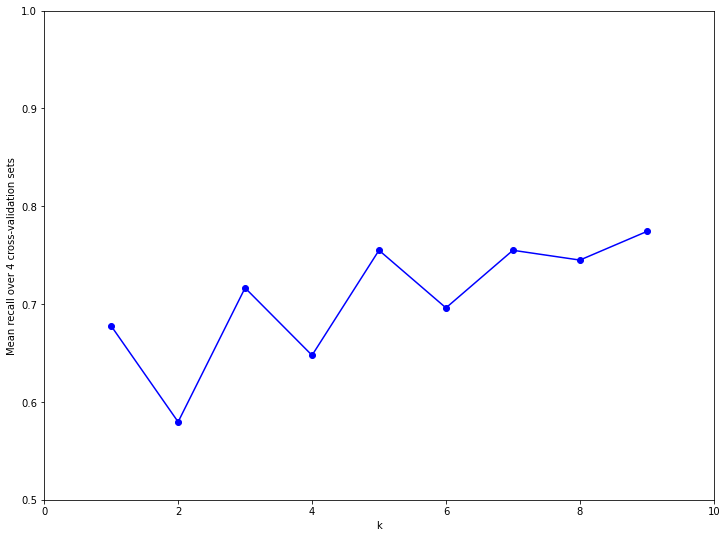

In [92]:
KNN_best_k = grid_search_KNN.best_params_['n_neighbors']
print("For a k-Nearest Neighbors model, the optimal value of k is "+str(KNN_best_k))
KNN_df = pd.DataFrame(grid_search_KNN.cv_results_)
fig_KNN = plt.figure(figsize=(12,9))
plt.plot(KNN_df['param_n_neighbors'],KNN_df['mean_test_score'],'b-o')
plt.xlim(0,10)
plt.ylim(0.5,1.0)
plt.xlabel('k')
plt.ylabel('Mean recall over 4 cross-validation sets')

In [93]:
classifier = KNeighborsClassifier(n_neighbors = 9, metric = 'minkowski', p = 2)
classifier = classifier.fit(X_train,y_train)

Predicted values:

[1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 1
 1 1]

Confusion Matrix: 
 [[35  5]
 [ 5 31]]

Accuracy : 86.842
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.86      0.86      0.86        36

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76



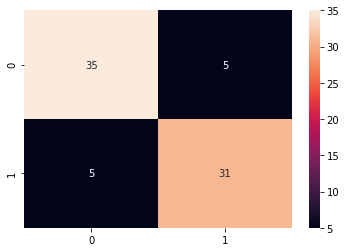

In [94]:
y_predict = classifier.predict(X_test)
print("Predicted values:\n")
print(y_predict)
cal_accuracy(y_test, y_predict)
print(classification_report(y_test,y_predict))
sns.heatmap(confusion_matrix(y_test,y_predict),annot=True)

In [95]:
print(accuracy_score(y_test,y_predict))

0.868421052631579


In [96]:
models=pd.DataFrame({'Model':['Random Forest','Logistics Regression','eXtreme Gradient Boosting','AdaBoost','SVM'],
                     'Traning Accuracy':[(model.score(X_train,y_train)),lr_cv.score(X_train,y_train),xgb_model.score(X_train,y_train),ABC.score(X_train,y_train),grid.score(X_train,y_train)],
                     'Test Accuracy':[(model.score(X_test,y_test)),lr_cv.score(X_test,y_test),xgb_model.score(X_test,y_test),ABC.score(X_test,y_test),grid.score(X_test,y_test)]})
models.sort_values(by='Test Accuracy', ascending=False)

,Model,Traning Accuracy,Test Accuracy
4,SVM,0.844444,0.894737
1,Logistics Regression,0.848889,0.881579
2,eXtreme Gradient Boosting,0.840000,0.881579
0,Random Forest,0.875556,0.842105
3,AdaBoost,0.871111,0.815789


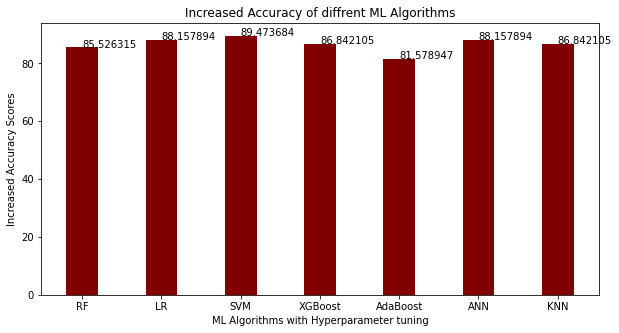

In [97]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'RF':85.526315,'LR':88.157894,'SVM':89.473684, 'XGBoost':86.842105,'AdaBoost':81.578947,'ANN':88.157894,'KNN':86.842105}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10,5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',width = 0.4)
for i in range(len(courses)):
    plt.text(i,values[i],values[i])

plt.xlabel("ML Algorithms with Hyperparameter tuning")
plt.ylabel("Increased Accuracy Scores")
plt.title("Increased Accuracy of diffrent ML Algorithms")
plt.show()


# For manulally inputting data and finding whether Heart Disease or not

In [100]:
print("Enter Patients Name:")
name = input()
print("Enter Patients Age:")
Age = int(input())
print("Enter Patients Gender (if male=1,if female=0):")
Sex = int(input())  
print("Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)")
Fbs = int(input())
print("What is your maximum heart rate achieved")  
MaxHR = int(input())
print("Do you have Exercise Induced Angina? (1=True, 0=False)")  
ExAng = int(input())
print("What is your ST depression induced by exercise relative to rest?")  
Oldpeak = float(input())
print("What is your number of major vessels (0-4) colored by flourosopy ")   
Ca = int(input())
print("Do you have Asymptomatic Chest pain? (1=True, 0=False)")
ACP = int(input())
print("Do you have Non-anginal Chest pain? (1=True, 0=False)")
NACP = int(input())   
print("Do you have Non-typical Chest pain? (1=True, 0=False)")
NTCP = int(input()) 
print("Do you have typical Chest pain? (1=True, 0=False)")
TCP = int(input()) 
print("Do you have normal Resting Electrocardiographic? (1=True, 0=False)")
NREC = int(input())
print("Do you have Wave abnormal Resting Electrocardiographic? (1=True, 0=False)")
WAREC = int(input())
print("Do you have Ventricular Resting Electrocardiographic? (1=True, 0=False)")
VREC = int(input())
print("Do you have slope Upsloping? (1=True, 0=False)")
SUPS = int(input())
print("Do you have slope flat? (1=True, 0=False)")
Sf = int(input())
print("Do you have slope Downsloping? (1=True, 0=False)")
SDS = int(input())
print("Do you have fixed Thal? (1=True, 0=False)")
FT = int(input())
print("Do you have Normal Thal? (1=True, 0=False)")
NT = int(input())
print("Do you have Reversable Thal? (1=True, 0=False)")
RT = int(input())

Enter Patients Name:
Kartikay
Enter Patients Age:
60
Enter Patients Gender (if male=1,if female=0):
1
Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)
1
What is your maximum heart rate achieved
160
Do you have Exercise Induced Angina? (1=True, 0=False)
1
What is your ST depression induced by exercise relative to rest?
1.4
What is your number of major vessels (0-4) colored by flourosopy 
2
Do you have Asymptomatic Chest pain? (1=True, 0=False)
0
Do you have Non-anginal Chest pain? (1=True, 0=False)
0
Do you have Non-typical Chest pain? (1=True, 0=False)
0
Do you have typical Chest pain? (1=True, 0=False)
1
Do you have normal Resting Electrocardiographic? (1=True, 0=False)
0
Do you have Wave abnormal Resting Electrocardiographic? (1=True, 0=False)
1
Do you have Ventricular Resting Electrocardiographic? (1=True, 0=False)
0
Do you have slope Upsloping? (1=True, 0=False)
0
Do you have slope flat? (1=True, 0=False)
1
Do you have slope Downsloping? (1=True, 0=False)
0
Do you have fi

In [102]:
arr = [[Age,Sex,Fbs,MaxHR,ExAng,Oldpeak,Ca,ACP,NACP,NTCP,TCP,NREC,WAREC,VREC,SUPS,Sf,SDS,FT,NT,RT]]
x = grid.predict(arr)[0]
[]
perc = str(int(model.predict_proba(arr)[0,1]*100))
print('Hello ' + name + '!')
if (x==0):
    print('You are safe from any kind of Heart Diseases')
    print('You have only '+perc+'% chances of getting a Heart Disease which is normal for a healthy human being')
else:
    print('You have a Heart Disease')
    print('You have a high '+perc+'% chances of getting a Heart Disease. You must immediately consult a doctor')

Hello Kartikay!
You are safe from any kind of Heart Diseases
You have only 58% chances of getting a Heart Disease which is normal for a healthy human being


In [ ]:
print("Enter Patients Name:")
name = input()
print("Enter Patients Age:")
Age = int(input())
print("Enter Patients Gender (if male=1,if female=0):")
Sex = int(input())  
print("Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)")
Fbs = int(input())
print("What is your maximum heart rate achieved")  
MaxHR = int(input())
print("Do you have Exercise Induced Angina? (1=True, 0=False)")  
ExAng = int(input())
print("What is your ST depression induced by exercise relative to rest?")  
Oldpeak = float(input())
print("What is your number of major vessels (0-4) colored by flourosopy ")   
Ca = int(input())
print("Do you have Asymptomatic Chest pain? (1=True, 0=False)")
ACP = int(input())
print("Do you have Non-anginal Chest pain? (1=True, 0=False)")
NACP = int(input())   
print("Do you have Non-typical Chest pain? (1=True, 0=False)")
NTCP = int(input()) 
print("Do you have typical Chest pain? (1=True, 0=False)")
TCP = int(input()) 
print("Do you have normal Resting Electrocardiographic? (1=True, 0=False)")
NREC = int(input())
print("Do you have Wave abnormal Resting Electrocardiographic? (1=True, 0=False)")
WAREC = int(input())
print("Do you have Ventricular Resting Electrocardiographic? (1=True, 0=False)")
VREC = int(input())
print("Do you have slope Upsloping? (1=True, 0=False)")
SUPS = int(input())
print("Do you have slope flat? (1=True, 0=False)")
Sf = int(input())
print("Do you have slope Downsloping? (1=True, 0=False)")
SDS = int(input())
print("Do you have fixed Thal? (1=True, 0=False)")
FT = int(input())
print("Do you have Normal Thal? (1=True, 0=False)")
NT = int(input())
print("Do you have Reversable Thal? (1=True, 0=False)")
RT = int(input())

Enter Patients Name:
Prerna Totlani
Enter Patients Age:
47
Enter Patients Gender (if male=1,if female=0):
0
Is your Fasting Blood Sugar > 120 mg/dl? (1=True, 0=False)
0
What is your maximum heart rate achieved
160
Do you have Exercise Induced Angina? (1=True, 0=False)
0
What is your ST depression induced by exercise relative to rest?
0.2
What is your number of major vessels (0-4) colored by flourosopy 
0
Do you have Asymptomatic Chest pain? (1=True, 0=False)
0
Do you have Non-anginal Chest pain? (1=True, 0=False)
0
Do you have Non-typical Chest pain? (1=True, 0=False)
0
Do you have typical Chest pain? (1=True, 0=False)
1
Do you have normal Resting Electrocardiographic? (1=True, 0=False)
0
Do you have Wave abnormal Resting Electrocardiographic? (1=True, 0=False)


In [91]:
arr = [[Age,Sex,Fbs,MaxHR,ExAng,Oldpeak,Ca,ACP,NACP,NTCP,TCP,NREC,WAREC,VREC,SUPS,Sf,SDS,FT,NT,RT]]
x = model.predict(arr)[0]
[]
perc = str(int(model.predict_proba(arr)[0,1]*100))
print('Hello ' + name + '!')
if (x==0):
    print('You are safe from any kind of Heart Diseases')
    print('You have only '+perc+'% chances of getting a Heart Disease which is normal for a healthy human being')
else:
    print('You have a Heart Disease')
    print('You have a high '+perc+'% chances of getting a Heart Disease. You must immediately consult a doctor')

Hello Prerna Totlani!
You are safe from any kind of Heart Diseases
You have only 46% chances of getting a Heart Disease which is normal for a healthy human being


# Feature Importance 

### Logistic regression

In [98]:
# Fit the instance of LogisticRegression
clf = LogisticRegression(C=0.38566204211634725,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [99]:
# Checking coefficients
clf.coef_

array([[ 0.15285041,  0.3166406 , -0.03886253, -0.27009525,  0.31060098,
         0.43980166,  0.92921492,  0.43637884, -0.46857283,  0.02274833,
        -0.04773499, -0.13217819, -0.0203074 ,  0.13683703, -0.18978306,
         0.14723596,  0.08350328, -0.18037113, -0.36579338,  0.45497198]])

In [100]:
# Match coef's of features to columns

feature_dictionary_lr = dict(zip(df.columns, list(clf.coef_[0])))
feature_dictionary_lr

{'Age': 0.15285040589059712,
 'Sex': 0.3166406038450322,
 'RestBP': -0.03886253099066586,
 'Chol': -0.27009524589094225,
 'Fbs': 0.31060097729615926,
 'MaxHR': 0.4398016556578888,
 'ExAng': 0.9292149177671108,
 'Oldpeak': 0.4363788370866292,
 'Ca': -0.4685728349518164,
 'Target': 0.022748326100380946,
 'asymptomatic': -0.04773499096275714,
 'nonanginal': -0.13217819009978157,
 'nontypical': -0.020307400477872634,
 'typical': 0.13683702728341685,
 'Normal_restECG': -0.18978305644884255,
 'Wave_abnormal_restECG': 0.14723595516986082,
 'Ventricular_ht_restECG': 0.08350328084389821,
 'Slope_upsloping': -0.18037112500746516,
 'Slope_flat': -0.36579337643702425,
 'Slope_downsloping': 0.4549719832683301}

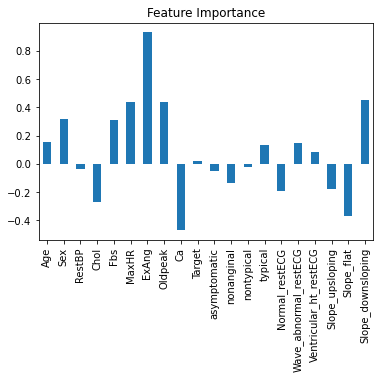

In [101]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary_lr, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### Decision Tree

In [102]:
gini.feature_importances_

array([0.14557657, 0.        , 0.        , 0.01802014, 0.08342996,
       0.        , 0.13229126, 0.        , 0.08697298, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.53370908, 0.        ])

In [103]:
feature_dictionary_dt = dict(zip(df.columns, list(gini.feature_importances_)))
feature_dictionary_dt

{'Age': 0.14557657120020287,
 'Sex': 0.0,
 'RestBP': 0.0,
 'Chol': 0.018020143470493594,
 'Fbs': 0.08342996062103661,
 'MaxHR': 0.0,
 'ExAng': 0.1322912616302685,
 'Oldpeak': 0.0,
 'Ca': 0.08697298392203169,
 'Target': 0.0,
 'asymptomatic': 0.0,
 'nonanginal': 0.0,
 'nontypical': 0.0,
 'typical': 0.0,
 'Normal_restECG': 0.0,
 'Wave_abnormal_restECG': 0.0,
 'Ventricular_ht_restECG': 0.0,
 'Slope_upsloping': 0.0,
 'Slope_flat': 0.5337090791559667,
 'Slope_downsloping': 0.0}

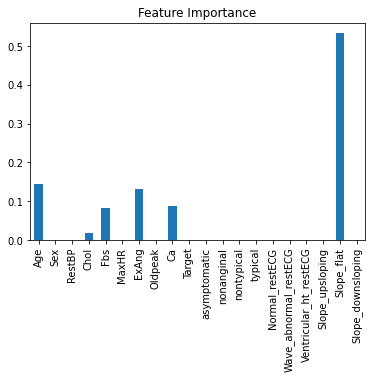

In [104]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary_dt, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### Random Forest

In [105]:
forest.feature_importances_

array([0.109977  , 0.02773431, 0.01192488, 0.14732232, 0.05197129,
       0.11831001, 0.10670572, 0.07862421, 0.03090583, 0.01249749,
       0.01312584, 0.02224121, 0.00030382, 0.01906471, 0.02445198,
       0.02124569, 0.00529003, 0.00610163, 0.10048155, 0.0917205 ])

In [106]:
feature_dictionary_rf = dict(zip(df.columns, list(forest.feature_importances_)))
feature_dictionary_rf

{'Age': 0.10997700171245997,
 'Sex': 0.02773431040257294,
 'RestBP': 0.011924876934885555,
 'Chol': 0.1473223204315806,
 'Fbs': 0.05197128963485821,
 'MaxHR': 0.1183100133072824,
 'ExAng': 0.1067057155764975,
 'Oldpeak': 0.07862420609081369,
 'Ca': 0.030905832632942137,
 'Target': 0.012497494785356339,
 'asymptomatic': 0.01312583572095666,
 'nonanginal': 0.022241205145254912,
 'nontypical': 0.00030382276659826667,
 'typical': 0.01906470963681975,
 'Normal_restECG': 0.024451978338969206,
 'Wave_abnormal_restECG': 0.02124568626445207,
 'Ventricular_ht_restECG': 0.005290030196472756,
 'Slope_upsloping': 0.006101627794794787,
 'Slope_flat': 0.10048154555346256,
 'Slope_downsloping': 0.09172049707296964}

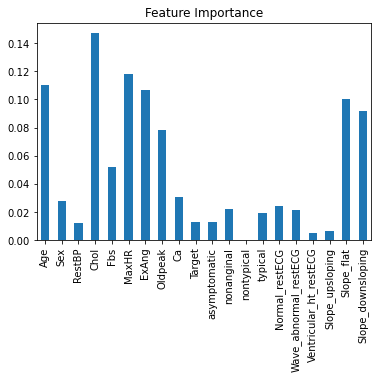

In [107]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary_rf, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

### XGBoost (eXtreme Gradient Boosting)

In [108]:
XGB.feature_importances_

array([0.02896032, 0.02927834, 0.0227852 , 0.01937967, 0.04278852,
       0.03316652, 0.07672396, 0.10105539, 0.04582391, 0.00796144,
       0.10530926, 0.0239182 , 0.        , 0.00098937, 0.01772789,
       0.01759074, 0.        , 0.04605742, 0.3302549 , 0.05022891],
      dtype=float32)

In [109]:
feature_dictionary_XGB = dict(zip(df.columns, list(XGB.feature_importances_)))
feature_dictionary_XGB

{'Age': 0.02896032,
 'Sex': 0.029278342,
 'RestBP': 0.022785198,
 'Chol': 0.01937967,
 'Fbs': 0.042788524,
 'MaxHR': 0.033166524,
 'ExAng': 0.07672396,
 'Oldpeak': 0.10105539,
 'Ca': 0.045823913,
 'Target': 0.007961444,
 'asymptomatic': 0.10530926,
 'nonanginal': 0.023918204,
 'nontypical': 0.0,
 'typical': 0.0009893677,
 'Normal_restECG': 0.017727891,
 'Wave_abnormal_restECG': 0.017590743,
 'Ventricular_ht_restECG': 0.0,
 'Slope_upsloping': 0.046057418,
 'Slope_flat': 0.3302549,
 'Slope_downsloping': 0.050228912}

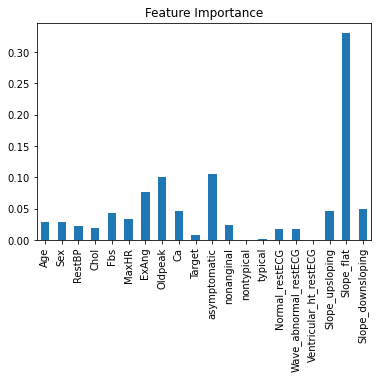

In [110]:
# Visualize the feature importance
feature_XGB = pd.DataFrame(feature_dictionary_XGB, index=[0])
feature_XGB.T.plot.bar(title="Feature Importance", legend=False);

### AdaBoost

In [111]:
ABC.feature_importances_

array([0.0952381 , 0.04761905, 0.        , 0.28571429, 0.        ,
       0.28571429, 0.04761905, 0.04761905, 0.04761905, 0.        ,
       0.        , 0.04761905, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.04761905, 0.04761905, 0.        ])

In [112]:
feature_dictionary_ABC = dict(zip(df.columns, list(ABC.feature_importances_)))
feature_dictionary_ABC

{'Age': 0.09523809523809523,
 'Sex': 0.047619047619047616,
 'RestBP': 0.0,
 'Chol': 0.2857142857142857,
 'Fbs': 0.0,
 'MaxHR': 0.2857142857142857,
 'ExAng': 0.047619047619047616,
 'Oldpeak': 0.047619047619047616,
 'Ca': 0.047619047619047616,
 'Target': 0.0,
 'asymptomatic': 0.0,
 'nonanginal': 0.047619047619047616,
 'nontypical': 0.0,
 'typical': 0.0,
 'Normal_restECG': 0.0,
 'Wave_abnormal_restECG': 0.0,
 'Ventricular_ht_restECG': 0.0,
 'Slope_upsloping': 0.047619047619047616,
 'Slope_flat': 0.047619047619047616,
 'Slope_downsloping': 0.0}

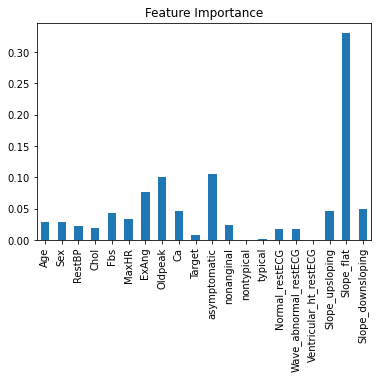

In [113]:
# Visualize the feature importance
feature_XGB = pd.DataFrame(feature_dictionary_XGB, index=[0])
feature_XGB.T.plot.bar(title="Feature Importance", legend=False);

In [38]:
import pickle
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(grid, file)

NameError: name 'grid' is not defined

In [39]:
import numpy as np
import pickle
from flask import Flask, request, render_template

In [116]:
# Create application
app = Flask(__name__)

In [117]:
# Load machine learning model
model = pickle.load(open('model.pkl', 'rb'))

In [118]:
# Bind home function to URL
@app.route('/')
def home():
    return render_template('Dekstop/Heart Disease Classifier.html')

In [119]:
# Bind predict function to URL
@app.route('/predict', methods =['POST'])
def predict():
 
    # Put all form entries values in a list 
    features = [float(i) for i in request.form.values()]
    # Convert features to array
    array_features = [np.array(features)]
    # Predict features
    prediction = model.predict(array_features)
 
    output = prediction
 
    # Check the output values and retrieve the result with html tag based on the value
    if output == 1:
        return render_template('Heart Disease Classifier.html', 
     result = 'The patient is not likely to have heart disease!')
    else:
        return render_template('Heart Disease Classifier.html', 
     result = 'The patient is likely to have heart disease!')

In [37]:
if __name__ == '__main__':
#Run the application
    app.run()

NameError: name 'app' is not defined